<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_16_ensemble_048_optimal_thresholds_master_custom_threshold_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



### Problem of Class Imbalance

**Class imbalance** occurs when one class in a dataset significantly outnumbers the other classes. This is common in many real-world scenarios, such as fraud detection, medical diagnoses, and loan defaults. In such cases, the majority class (the more frequent class) dominates the dataset, while the minority class (the less frequent class) is underrepresented.

### Impact on Model Performance

When training a machine learning model on imbalanced data, the model tends to become biased towards the majority class. This bias can lead to the following issues:

1. **High Accuracy but Poor Minority Class Performance**: The model may achieve high overall accuracy by simply predicting the majority class most of the time. However, it will likely perform poorly on the minority class, failing to identify critical instances.

2. **High Precision and Recall for the Majority Class**: Precision and recall scores for the majority class may be high because the model is good at predicting the majority class correctly. However, this often comes at the expense of poor performance for the minority class.

3. **Low Precision and Recall for the Minority Class**: Precision and recall scores for the minority class are typically low because the model struggles to correctly identify minority class instances. This is problematic in scenarios where identifying the minority class correctly is crucial (e.g., detecting fraudulent transactions or diagnosing diseases).

### Checking for Class Imbalance Issues

To check for the impact of class imbalance on model performance, you can:

1. **Analyze Class Distribution**: Examine the distribution of classes in your dataset. If there is a significant imbalance, it indicates a potential issue.

2. **Evaluate Precision and Recall Scores**: Assess precision and recall scores for both the majority and minority classes. High precision and recall for the majority class and low scores for the minority class suggest that the model is biased towards the majority class.

3. **Confusion Matrix**: A confusion matrix provides a detailed breakdown of true positives, false positives, true negatives, and false negatives for each class. This helps in understanding how well the model performs on each class.

4. **F1 Score**: The F1 score, which is the harmonic mean of precision and recall, can be calculated for both classes. A low F1 score for the minority class indicates poor performance.

### Addressing Class Imbalance

To address class imbalance and improve model performance on the minority class, you can:

1. **Resampling Techniques**: Use techniques like oversampling (e.g., SMOTE) to increase the number of minority class instances, or undersampling to reduce the number of majority class instances.

2. **Class Weight Adjustment**: Adjust class weights in your model to give more importance to the minority class. This helps the model focus on learning to identify minority class instances better.

3. **Ensemble Methods**: Use ensemble methods like bagging and boosting, which can help improve the performance of models on imbalanced data.

4. **Threshold Tuning**: Adjust the decision threshold to balance precision and recall for the minority class.

By implementing these techniques, you can create more balanced models that perform well on both the majority and minority classes, leading to more reliable and accurate predictions.

### Threshold Experiment Summary

In this experiment, we aim to evaluate and compare the performance of various machine learning models using different threshold tuning methods. Our primary goal is to determine the optimal thresholds for classifying loan defaults, which is a critical task due to the class imbalance in the dataset. We will employ Voting and Stacking classifiers to leverage the strengths of multiple models and enhance overall performance.

**Objective:**
The objective of this experiment is to identify the most effective threshold tuning method for optimizing model performance, particularly focusing on recall and precision for loan defaults (class 1). We will explore three threshold tuning methods:
1. **ROC Analysis**: Utilizing the Receiver Operating Characteristic curve to determine the optimal threshold that maximizes the true positive rate while minimizing the false positive rate.
2. **Grid Search**: Performing an exhaustive search over a specified parameter grid to find the optimal threshold that balances precision and recall.
3. **Custom Loss Function**: Implementing a custom loss function to directly optimize for class-specific metrics (e.g., recall for class 1) during threshold determination.

**Approach:**
1. **Data Preparation**:
    - Load and preprocess the loan default dataset.
    - Split the data into training and testing sets.

2. **Model Definition**:
    - Define base models using optimal parameters obtained from previous tuning experiments.
    - Configure Voting and Stacking classifiers to combine the strengths of multiple models.

3. **Threshold Tuning Methods**:
    - **ROC Analysis**: Identify the optimal threshold using the ROC curve and AUC.
    - **Grid Search**: Perform a grid search to find the threshold that maximizes F1 score.
    - **Custom Loss Function**: Apply a custom loss function to determine the best threshold for class-specific metrics.

4. **Training and Evaluation**:
    - Train the Voting and Stacking classifiers using the determined optimal thresholds.
    - Evaluate the classifiers' performance using metrics such as precision, recall, F1 score, and AUC.
    - Save the results for each threshold tuning method.

5. **Results Visualization and Comparison**:
    - Visualize the ROC curves and other relevant performance metrics.
    - Compare the performance of the classifiers across different threshold tuning methods.
    - Summarize the findings and identify the most effective threshold tuning approach for loan default prediction.

**Expected Outcome:**
By systematically evaluating different threshold tuning methods, we expect to identify the approach that yields the highest recall and precision for loan defaults while maintaining a balanced F1 score. This experiment will provide valuable insights into the effectiveness of threshold tuning techniques and their impact on model performance, guiding future model development and optimization efforts.

This structured approach ensures a comprehensive evaluation of threshold tuning methods and facilitates easy replication and extension for future experiments.

## Load & Preprocess

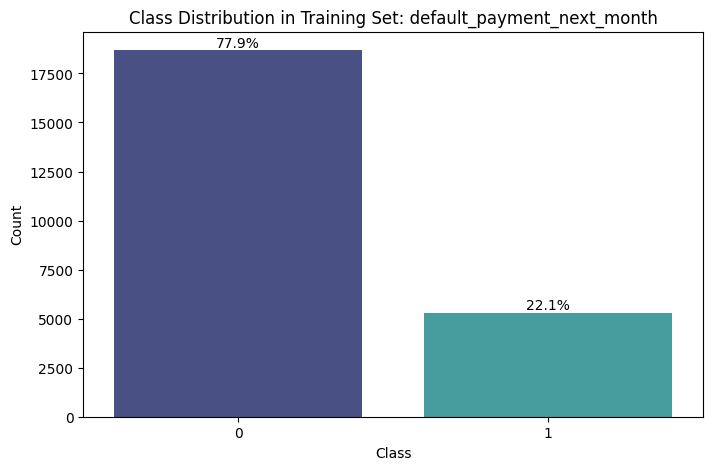

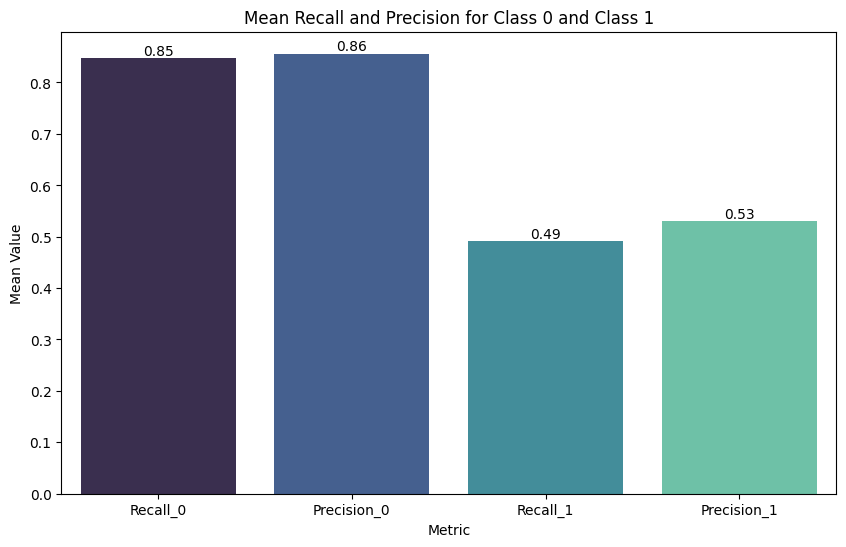

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import warnings
from loan_data_utils import (load_and_preprocess_data, plot_class_distribution, plot_mean_class_metrics,
                             get_top_performers, evaluate_model, plot_mean_class_metrics)
# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])


# Load the CSV file into a DataFrame
file_path = '/content/combined_model_metrics_with_resampling.csv'
metrics_df = pd.read_csv(file_path)

# plot metrics
plot_class_distribution(y_train, target)
plot_mean_class_metrics(metrics_df)


## Combine Results

In [30]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Summary Explanation of the Experiment
experiment_summary = """
In this experiment, we aim to evaluate and compare the performance of various machine learning models using different threshold tuning methods. Our primary goal is to determine the optimal thresholds for classifying loan defaults, which is a critical task due to the class imbalance in the dataset. We will employ Voting and Stacking classifiers to leverage the strengths of multiple models and enhance overall performance.

The threshold tuning methods include:
1. ROC Analysis
2. Grid Search
3. Custom Loss Function
4. F1 Score (Baseline)

Each method will be run in a separate notebook, and the results will be aggregated and compared in this master notebook.
"""
print(experiment_summary)

# 2. Load Results from Files
results_files = {
    'ROC Analysis': 'voting_stacking_results_roc.json',
    'Grid Search': 'voting_stacking_results_grid_search.json',
    'Custom Loss': 'voting_stacking_results_custom_loss.json',
    'F1 Score (Baseline)': 'voting_stacking_results_f1.json',
    'Class 1 Recall': 'voting_stacking_results_recall.json'
}

def load_results(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"File {file_name} not found.")
        return None

results = {method: load_results(file) for method, file in results_files.items()}

# Ensure results were loaded correctly
for method, result in results.items():
    if result is None:
        print(f"Results for {method} are missing. Please check the corresponding file.")
    else:
        print(f"Results for {method} loaded successfully.")

# 3. Combine All Results into a Single DataFrame
combined_df = pd.DataFrame()

for method_name, result in results.items():
    if result is not None:
        voting_results = pd.DataFrame(result['voting']).T
        stacking_results = pd.DataFrame(result['stacking']).T

        voting_results['Classifier'] = 'Voting'
        stacking_results['Classifier'] = 'Stacking'

        voting_results['Method'] = method_name
        stacking_results['Method'] = method_name

        combined_df = pd.concat([combined_df, voting_results, stacking_results], axis=0)

# Reset index for better readability
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Metric'}, inplace=True)

# Display the combined DataFrame
combined_df



In this experiment, we aim to evaluate and compare the performance of various machine learning models using different threshold tuning methods. Our primary goal is to determine the optimal thresholds for classifying loan defaults, which is a critical task due to the class imbalance in the dataset. We will employ Voting and Stacking classifiers to leverage the strengths of multiple models and enhance overall performance.

The threshold tuning methods include:
1. ROC Analysis
2. Grid Search
3. Custom Loss Function
4. F1 Score (Baseline)

Each method will be run in a separate notebook, and the results will be aggregated and compared in this master notebook.

Results for ROC Analysis loaded successfully.
Results for Grid Search loaded successfully.
Results for Custom Loss loaded successfully.
Results for F1 Score (Baseline) loaded successfully.
Results for Class 1 Recall loaded successfully.


,Metric,precision,recall,f1-score,support,Classifier,Method
0,0,0.895039,0.633212,0.741697,4673.000000,Voting,ROC Analysis
1,1,0.363771,0.738508,0.487441,1327.000000,Voting,ROC Analysis
2,accuracy,0.656500,0.656500,0.656500,0.656500,Voting,ROC Analysis
3,macro avg,0.629405,0.685860,0.614569,6000.000000,Voting,ROC Analysis
4,weighted avg,0.777541,0.656500,0.685464,6000.000000,Voting,ROC Analysis
5,0,0.866188,0.878237,0.872171,4673.000000,Stacking,ROC Analysis
6,1,0.549128,0.522231,0.535342,1327.000000,Stacking,ROC Analysis
7,accuracy,0.799500,0.799500,0.799500,0.799500,Stacking,ROC Analysis
8,macro avg,0.707658,0.700234,0.703756,6000.000000,Stacking,ROC Analysis
9,weighted avg,0.796065,0.799500,0.797676,6000.000000,Stacking,ROC Analysis


## Plot Metrics

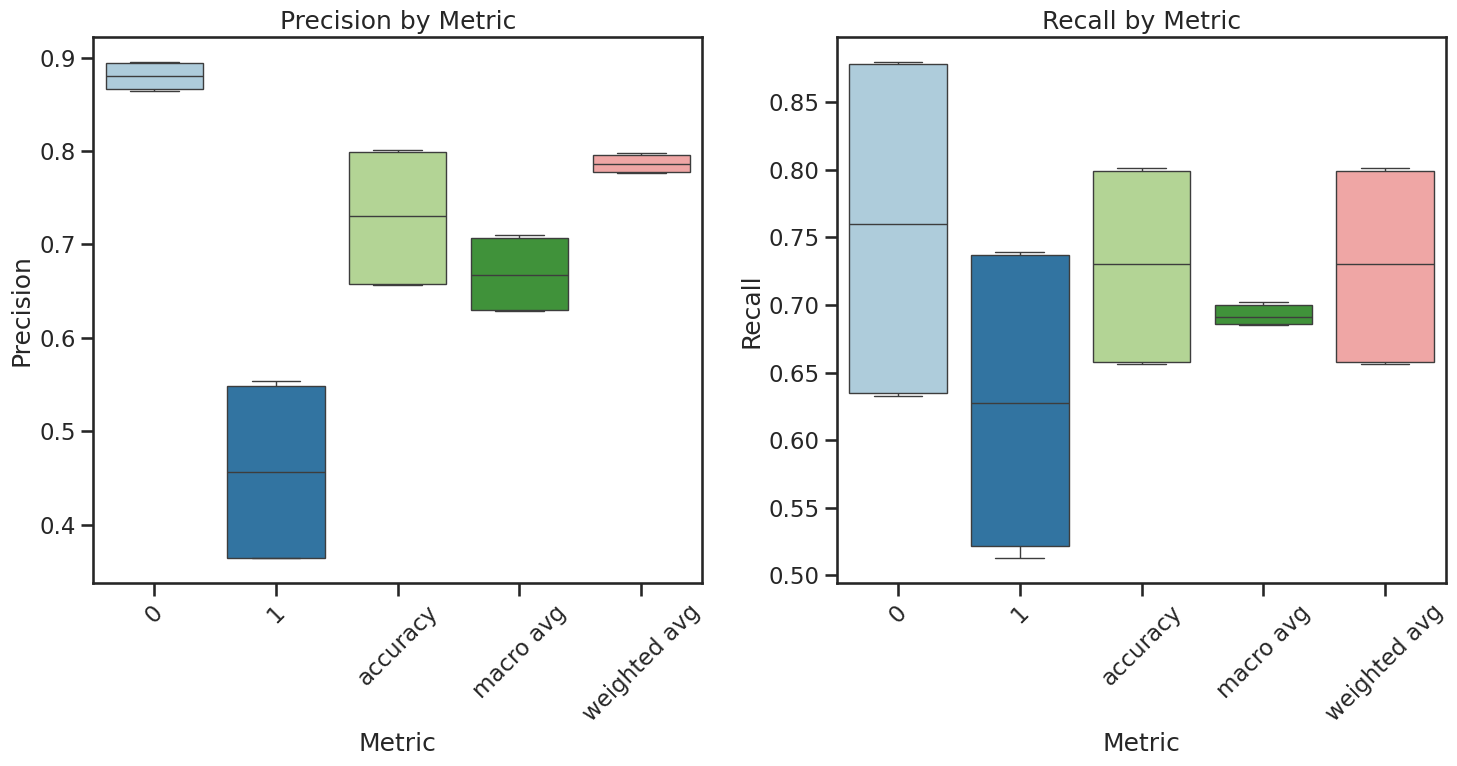

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for the plots
sns.set_style("ticks")
sns.set_context("talk")

# Create subplots for precision and recall side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Create a box plot for precision
sns.boxplot(x='Metric', y='precision', hue='Metric', palette='Paired', data=combined_df, ax=axes[0])
axes[0].set_title('Precision by Metric')
axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Precision')
# axes[0].legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Create a box plot for recall
sns.boxplot(x='Metric', y='recall', hue='Metric', palette='Paired', data=combined_df, ax=axes[1])
axes[1].set_title('Recall by Metric')
axes[1].set_xlabel('Metric')
axes[1].set_ylabel('Recall')
# axes[1].legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


In [6]:
class_0 = combined_df[combined_df['Metric'].isin(['0'])][['Metric', 'precision', 'recall', 'f1-score','Classifier', 'Method']]
class_1 = combined_df[combined_df['Metric'].isin(['1'])][['Metric', 'precision', 'recall', 'f1-score','Classifier', 'Method']]
class_0, class_1

(   Metric  precision    recall  f1-score Classifier               Method
 0       0   0.895039  0.633212  0.741697     Voting         ROC Analysis
 5       0   0.866188  0.878237  0.872171   Stacking         ROC Analysis
 10      0   0.895278  0.632998  0.741632     Voting          Grid Search
 15      0   0.866090  0.878879  0.872438   Stacking          Grid Search
 20      0   0.894419  0.634496  0.742364     Voting          Custom Loss
 25      0   0.865344  0.877381  0.871321   Stacking          Custom Loss
 30      0   0.895006  0.636636  0.744029     Voting  F1 Score (Baseline)
 35      0   0.867117  0.879735  0.873380   Stacking  F1 Score (Baseline)
 40      0   0.893218  0.642628  0.747480     Voting       Class 1 Recall
 45      0   0.863961  0.879307  0.871566   Stacking       Class 1 Recall,
    Metric  precision    recall  f1-score Classifier               Method
 1       1   0.363771  0.738508  0.487441     Voting         ROC Analysis
 6       1   0.549128  0.522231  0.53

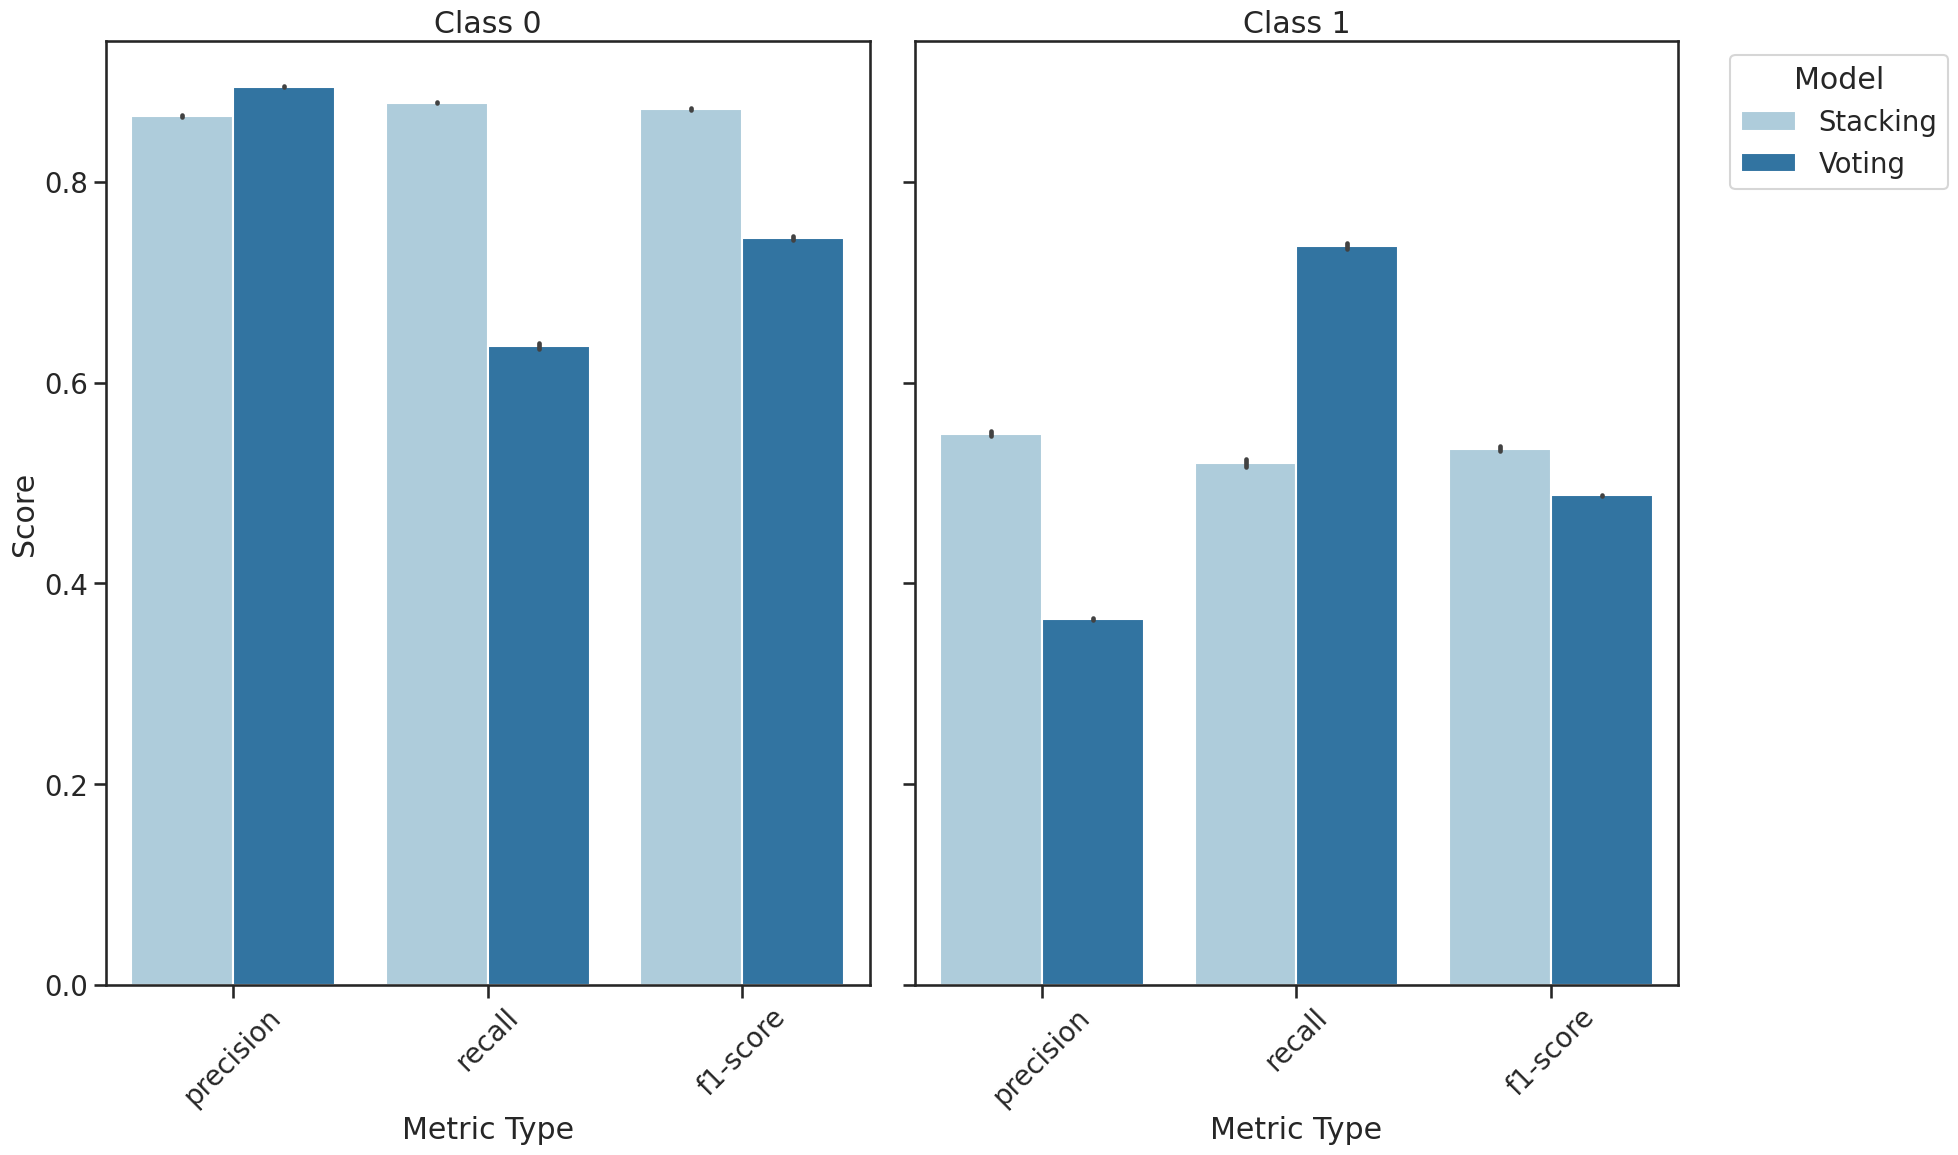

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for stacking and voting classifiers
stacking = combined_df[combined_df['Classifier'] == 'Stacking'].copy()
voting = combined_df[combined_df['Classifier'] == 'Voting'].copy()

# Add a 'Model' column
stacking.loc[:, 'Model'] = 'Stacking'
voting.loc[:, 'Model'] = 'Voting'

# Combine the filtered dataframes for plotting
combined_filtered = pd.concat([stacking, voting])

# Melt the dataframe to have precision, recall, and f1-score in the same column
combined_filtered_melted = combined_filtered.melt(id_vars=['Metric', 'Model'], value_vars=['precision', 'recall', 'f1-score'],
                                                  var_name='Metric Type', value_name='Score')

# Set the style and context for the plots
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.2)

# Create subplots for class 0 and class 1 side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=True)

# Create a bar plot for class 0
sns.barplot(x='Metric Type', y='Score', hue='Model', palette='Paired', legend=False,
            data=combined_filtered_melted[combined_filtered_melted['Metric'] == '0'], ax=axes[0])
axes[0].set_title('Class 0')
axes[0].set_xlabel('Metric Type')
axes[0].set_ylabel('Score')
# axes[0].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar plot for class 1
sns.barplot(x='Metric Type', y='Score', hue='Model', palette='Paired', data=combined_filtered_melted[combined_filtered_melted['Metric'] == '1'], ax=axes[1])
axes[1].set_title('Class 1')
axes[1].set_xlabel('Metric Type')
axes[1].set_ylabel('Score')
axes[1].legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

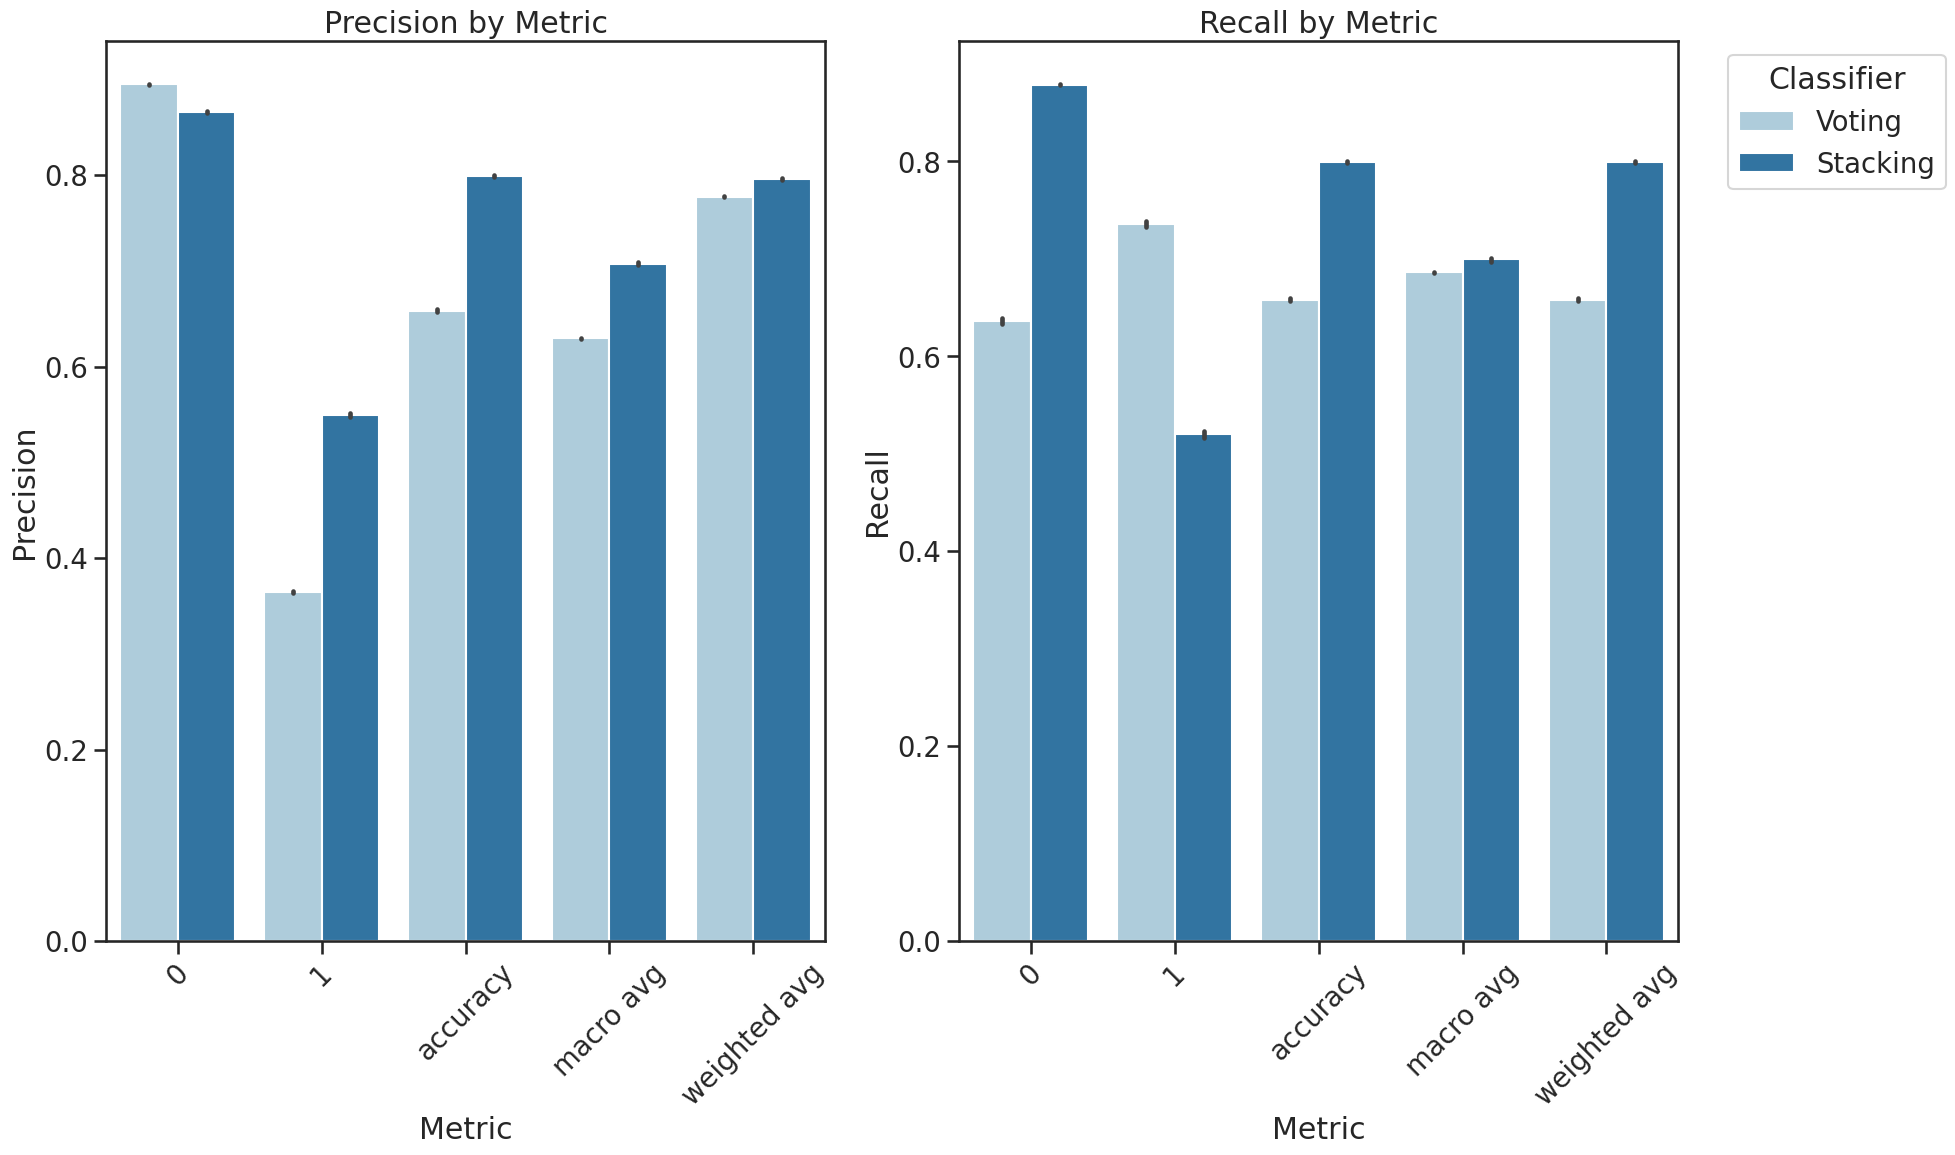

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and context for the plots
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.2)

# Create subplots for precision and recall side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 12))

# Create a bar plot for precision
sns.barplot(x='Metric', y='precision', hue='Classifier', palette='Paired', data=combined_df, ax=axes[0], legend=False)
axes[0].set_title('Precision by Metric')
axes[0].set_xlabel('Metric')
axes[0].set_ylabel('Precision')
# axes[0].legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=45)

# Create a bar plot for recall
sns.barplot(x='Metric', y='recall', hue='Classifier', palette='Paired', data=combined_df, ax=axes[1])
axes[1].set_title('Recall by Metric')
axes[1].set_xlabel('Metric')
axes[1].set_ylabel('Recall')
axes[1].legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

In [52]:
# Filter the dataframe for class 0 and class 1
df_class_0 = combined_df[combined_df['Metric'].isin(['0'])][['Metric', 'precision', 'recall', 'f1-score','Classifier']].sort_values(by='Classifier')
df_class_1 = combined_df[combined_df['Metric'].isin(['1'])][['Metric', 'precision', 'recall', 'f1-score','Classifier']].sort_values(by='Classifier')
df_class_0, df_class_1

(   Metric  precision    recall  f1-score Classifier
 5       0   0.866188  0.878237  0.872171   Stacking
 15      0   0.866090  0.878879  0.872438   Stacking
 25      0   0.865344  0.877381  0.871321   Stacking
 35      0   0.867117  0.879735  0.873380   Stacking
 45      0   0.863961  0.879307  0.871566   Stacking
 0       0   0.895039  0.633212  0.741697     Voting
 10      0   0.895278  0.632998  0.741632     Voting
 20      0   0.894419  0.634496  0.742364     Voting
 30      0   0.895006  0.636636  0.744029     Voting
 40      0   0.893218  0.642628  0.747480     Voting,
    Metric  precision    recall  f1-score Classifier
 6       1   0.549128  0.522231  0.535342   Stacking
 16      1   0.550079  0.521477  0.535397   Stacking
 26      1   0.545959  0.519216  0.532252   Stacking
 36      1   0.553614  0.525245  0.539056   Stacking
 46      1   0.546624  0.512434  0.528977   Stacking
 1       1   0.363771  0.738508  0.487441     Voting
 11      1   0.363872  0.739261  0.487696    

### Analysis of the Results with Focus on Class 1 Recall

**Primary Concern: Class 1 Recall**

Given that our primary concern is class 1 recall, we need to focus on the recall values for class 1 across both the Stacking and Voting classifiers. Here are the key observations:

#### Stacking Classifier
- **Recall** for Class 1 is relatively consistent across different models:
  - `Stacking`: 0.522231, 0.521477, 0.519216, 0.525245, 0.512434
- **Precision** and **F1-score**:
  - Precision ranges around 0.549128 to 0.553614.
  - F1-score ranges from 0.528977 to 0.539056.
  
#### Voting Classifier
- **Recall** for Class 1 is significantly higher than the Stacking classifier:
  - `Voting`: 0.738508, 0.739261, 0.736247, 0.737001, 0.729465
- **Precision** and **F1-score**:
  - Precision is lower, around 0.363771 to 0.366945.
  - F1-score is also lower, ranging from 0.487039 to 0.488634.

### Comparison and Conclusion
1. **Recall (Class 1)**:
   - The Voting classifier consistently shows much higher recall for class 1 compared to the Stacking classifier. This suggests that the Voting classifier is better at identifying actual positives (loan defaults) even though it might be at the cost of precision.

2. **Precision (Class 1)**:
   - The Stacking classifier has higher precision than the Voting classifier. This means that while it identifies fewer positives, those identified are more likely to be true positives.

3. **F1-Score (Class 1)**:
   - The F1-score is slightly higher for the Stacking classifier compared to the Voting classifier. This indicates a more balanced performance between precision and recall.

4. **Trade-offs**:
   - The choice between Stacking and Voting classifiers depends on the business requirement. If identifying as many defaults as possible (high recall) is the primary goal, the Voting classifier is more suitable despite its lower precision. However, if the goal is a more balanced approach with fewer false positives, the Stacking classifier may be preferred.

### Recommendation
Given that class 1 recall is the priority:
- **Use Voting Classifier**: Given its higher recall for class 1, the Voting classifier is better suited for scenarios where identifying as many loan defaults as possible is critical, even if it results in more false positives.

### Next Steps
1. **Threshold Tuning**:
   - Fine-tune thresholds for both classifiers to see if precision can be improved without significantly impacting recall.
2. **Regularization**:
   - Introduce regularization in the final classifier models to see if performance improves further.



## Master Automation Notebook

In [ ]:
import json
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Summary Explanation of the Experiment
experiment_summary = """
In this experiment, we aim to evaluate and compare the performance of various machine learning models using different threshold tuning methods. Our primary goal is to determine the optimal thresholds for classifying loan defaults, which is a critical task due to the class imbalance in the dataset. We will employ Voting and Stacking classifiers to leverage the strengths of multiple models and enhance overall performance.

The threshold tuning methods include:
1. ROC Analysis
2. Grid Search
3. Custom Loss Function
4. F1 Score (Baseline)

Each method will be run in a separate notebook, and the results will be aggregated and compared in this master notebook.
"""
print(experiment_summary)

# 2. Load and Preprocess Data (for reference)
# This is a brief summary since the actual preprocessing will be done in the individual notebooks
from loan_data_utils import load_and_preprocess_data

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# 3. Upload Necessary Files to Each Notebook
notebooks = [
    'pipelines_16_ensemble_048_optimal_thresholds_f1.ipynb',
    'pipelines_16_ensemble_048_optimal_thresholds_recall.ipynb',
    'pipelines_16_ensemble_048_optimal_thresholds_grid_search.ipynb',
    'pipelines_16_ensemble_048_optimal_thresholds_custom_loss.ipynb',
    'pipelines_16_ensemble_048_optimal_thresholds_roc.ipynb'
]

necessary_files = ['optimal_model_params_thresholds_f1.json', 'optimal_model_params_thresholds_recall.json',
                   'optimal_model_params_thresholds_grid_search.json', 'optimal_model_params_thresholds_custom_loss.json',
                   'optimal_model_params_thresholds_roc.json', 'loan_data_utils.py']

for notebook in notebooks:
    for file in necessary_files:
        print(f'Uploading {file} to {notebook}...')
        subprocess.run(['cp', file, f'/content/{notebook}'])

# 4. Run Individual Notebooks for Each Method
for notebook in notebooks:
    print(f'Running {notebook}...')
    result = subprocess.run(['jupyter', 'nbconvert', '--to', 'notebook', '--execute', notebook])
    if result.returncode != 0:
        print(f"Error running {notebook}: {result.stderr}")

# 5. Aggregate and Compare Results
def load_results(file_name):
    try:
        with open(file_name, 'r') as file:
            return json.load(file)
    except FileNotFoundError:
        print(f"File {file_name} not found.")
        return None

# Load results from each method
results_roc = load_results('voting_stacking_results_roc.json')
results_grid_search = load_results('voting_stacking_results_grid_search.json')
results_custom_loss = load_results('voting_stacking_results_custom_loss.json')
results_f1 = load_results('voting_stacking_results_f1.json')

# Ensure results were loaded correctly
if results_roc is None or results_grid_search is None or results_custom_loss is None or results_f1 is None:
    print("One or more results files are missing. Please check the execution of the individual notebooks.")

# Compare results
def plot_comparison(results, method_name):
    if results is not None:
        voting_results = results['voting']
        stacking_results = results['stacking']

        print(f'{method_name} - Voting Classifier Performance:')
        print(pd.DataFrame(voting_results).T)

        print(f'{method_name} - Stacking Classifier Performance:')
        print(pd.DataFrame(stacking_results).T)

# Plot comparison for each method
plot_comparison(results_roc, 'ROC Analysis')
plot_comparison(results_grid_search, 'Grid Search')
plot_comparison(results_custom_loss, 'Custom Loss')
plot_comparison(results_f1, 'F1 Score (Baseline)')

# Additional visualization if needed
def plot_roc_curve(y_test, y_proba, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Example to plot ROC curve (assuming y_test and y_proba are available)
# plot_roc_curve(y_test, y_proba, 'Example ROC Curve')


### Data Utils Script

In [ ]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

def plot_mean_class_metrics(df):
    """
    Function to calculate and plot the mean recall and precision metrics for class 0 and class 1.
    """
    # Calculate the mean of recall and precision for both classes
    metrics_df = pd.DataFrame({
        'Metric': ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1'],
        'Mean Value': [
            df['Recall_0'].mean(),
            df['Precision_0'].mean(),
            df['Recall_1'].mean(),
            df['Precision_1'].mean()
        ]
    })

    # Plot the mean of recall and precision for each class
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Mean Value', data=metrics_df, palette='mako')
    plt.title('Mean Recall and Precision for Class 0 and Class 1')
    plt.xlabel('Metric')
    plt.ylabel('Mean Value')
    for index, row in metrics_df.iterrows():
        plt.text(index, row['Mean Value'], f'{row["Mean Value"]:.2f}', ha='center', va='bottom')
    plt.show()

#--------   Evaluate and Capture Metrics   --------#

# def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
#     logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

#     # Fit the pipeline
#     pipeline.fit(X_train, y_train)

#     # Make predictions
#     y_pred = pipeline.predict(X_test)

#     # Capture classification report
#     report = classification_report(y_test, y_pred, output_dict=True)

#     # Extract relevant metrics
#     metrics = {
#         'Model': model_name,
#         'Experiment': experiment_name,
#         'Recall_0': report['0']['recall'],
#         'Precision_0': report['0']['precision'],
#         'F1_0': report['0']['f1-score'],
#         'Recall_1': report['1']['recall'],
#         'Precision_1': report['1']['precision'],
#         'F1_1': report['1']['f1-score'],
#         'F1_Macro': report['macro avg']['f1-score'],
#         'Accuracy': report['accuracy']
#     }

#     logger.info(f"Completed evaluation for model: {model_name} ({experiment_name})")
#     return metrics

# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    return metrics

def compile_metrics(metrics_list, experiment_name='experiment_name'):
    metrics_df = pd.DataFrame(metrics_list)
    csv_filename = f'{experiment_name}_metrics.csv'
    metrics_df.to_csv(csv_filename, index=False)
    logger.info(f"Metrics saved to {csv_filename}")
    return metrics_df


def clean_params(params):
    """
    Clean the model parameters by removing the 'classifier__' prefix.
    """
    return {key.replace('classifier__', ''): value for key, value in params.items()}

# --------   Get Top Performers   --------#

import pandas as pd
def get_top_performers(metrics_df, top_n=3):
    metrics = ['Recall_0', 'Precision_0', 'Recall_1', 'Precision_1']
    top_performers = []

    for metric in metrics:
        sorted_df = metrics_df[['Experiment', 'Model', metric]].sort_values(by=metric, ascending=False).head(top_n)
        sorted_df['Metric'] = metric
        sorted_df = sorted_df.rename(columns={metric: 'Value'})
        top_performers.append(sorted_df)

    # Concatenate all top performers into a single DataFrame
    top_performers_df = pd.concat(top_performers, ignore_index=True)

    # Save the results to a CSV file
    top_performers_df.to_csv('top_performing_models.csv', index=False)
    return top_performers_df

def select_and_sort_top_n(df, columns, n=3):
    """
    Selects the top n rows based on each specified column and returns a DataFrame with all columns.

    Args:
    df (pd.DataFrame): The input DataFrame.
    columns (list of str): The columns to sort by.
    n (int): The number of top rows to select for each column.

    Returns:
    pd.DataFrame: A DataFrame containing the top n rows for each specified column, without duplicates.
    """
    top_n_combined_df = pd.DataFrame()

    for column in columns:
        top_n = df.nlargest(n, column)
        top_n_combined_df = pd.concat([top_n_combined_df, top_n])

    # Drop duplicates and reset index
    top_n_combined_df = top_n_combined_df.drop_duplicates().reset_index(drop=True)

    return top_n_combined_df

'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *